### Mounting the G-Drive

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


### Frame Extraction

In [2]:
# imports here

import sys
import argparse

import cv2
print(cv2.__version__)

import numpy as np
import os

3.4.3


In [0]:
def extract_image_one_fps(video_source_path):

    vidcap = cv2.VideoCapture(video_source_path)
    count = 0
    success = True
    while success:
        vidcap.set(cv2.CAP_PROP_POS_MSEC,(count*100))      
        success,image = vidcap.read()

        ## Stop when last frame is identified
        image_last = cv2.imread("/content/gdrive/My Drive/Key Frame/output1/frame{}.png".format(count-1))
        if np.array_equal(image,image_last):
            break

        cv2.imwrite("/content/gdrive/My Drive/Key Frame/output1/frame%d.png" % count, image)     # save frame as PNG file
        print('{}.sec reading a new frame: {} '.format(count,success))
        count += 1

#### Generating Frames

In [4]:
video_source_path = '/content/gdrive/My Drive/Key Frame/input1.avi'
extract_image_one_fps(video_source_path)

0.sec reading a new frame: True 
1.sec reading a new frame: True 
2.sec reading a new frame: True 
3.sec reading a new frame: True 
4.sec reading a new frame: True 
5.sec reading a new frame: True 
6.sec reading a new frame: True 
7.sec reading a new frame: True 
8.sec reading a new frame: True 
9.sec reading a new frame: True 
10.sec reading a new frame: True 
11.sec reading a new frame: True 
12.sec reading a new frame: True 
13.sec reading a new frame: True 
14.sec reading a new frame: True 
15.sec reading a new frame: True 
16.sec reading a new frame: True 
17.sec reading a new frame: True 
18.sec reading a new frame: True 
19.sec reading a new frame: True 
20.sec reading a new frame: True 
21.sec reading a new frame: True 
22.sec reading a new frame: True 
23.sec reading a new frame: True 
24.sec reading a new frame: True 
25.sec reading a new frame: True 
26.sec reading a new frame: True 
27.sec reading a new frame: True 
28.sec reading a new frame: True 
29.sec reading a new fra

#### Displaying Some Frames

Populating the interactive namespace from numpy and matplotlib


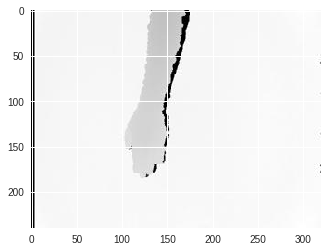

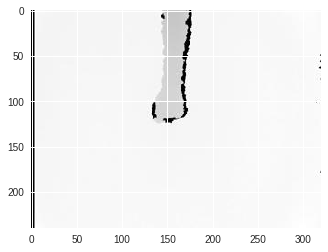

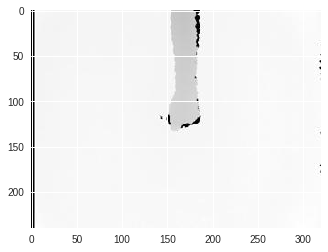

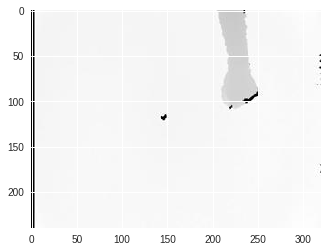

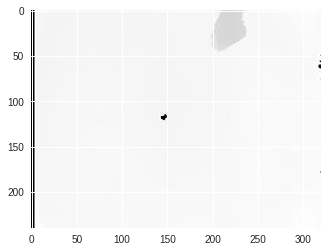

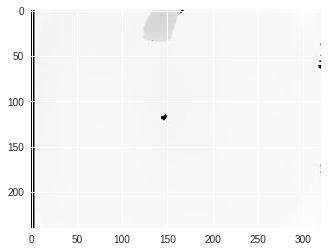

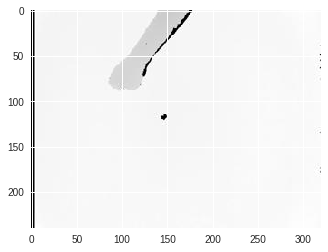

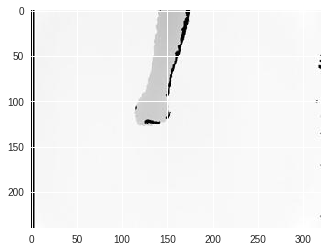

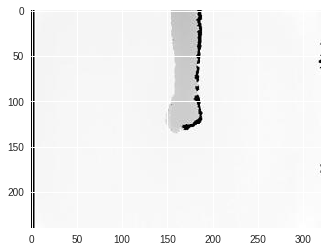

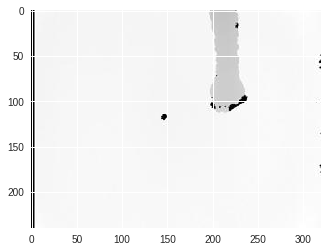

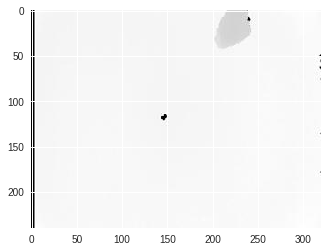

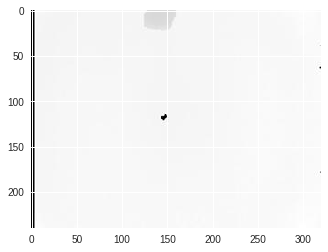

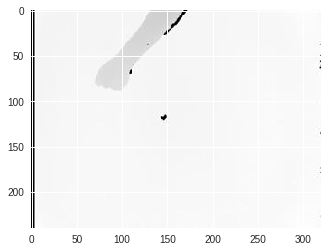

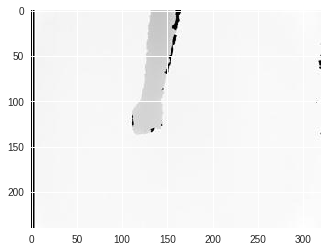

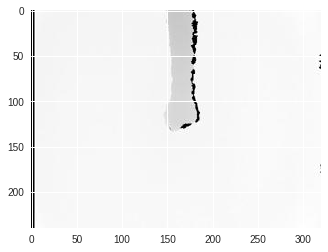

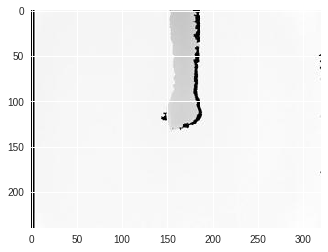

In [5]:
# Displaying Images

%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

for count in range(0, 159, 10):
    img=mpimg.imread('/content/gdrive/My Drive/Key Frame/output1/frame%d.png' % count)
    imgplot = plt.imshow(img)
    plt.show()

#### Extraction Algorithm

In [6]:
from PIL import Image

img = Image.open('/content/gdrive/My Drive/Key Frame/output1/frame0.png').convert('LA')
#plt.imshow(img)

gray_img = np.asarray(img)
hist = cv2.calcHist([gray_img],[0],None,[256],[0,256])
#plt.hist(gray_img.ravel(),256,[0,256])
#plt.title('Histogram for gray scale picture')
#plt.show()

print(hist.shape)
print(gray_img.shape)

(256, 1)
(240, 320, 2)


In [0]:
r, c, ch = gray_img.shape

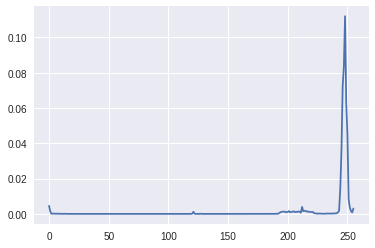

In [8]:
pdf = hist / (r*c*ch)
plt.plot(np.array(range(0, 256)), pdf)

In [9]:
pdf.shape

(256, 1)

In [0]:
#pdf

In [0]:
def Entropy(pdf):
    pdf = pdf + 0.001
    pdf = pdf / np.mean(pdf)
    return -np.matmul(pdf.T, np.log(pdf))[0][0]

In [12]:
Entropy(pdf)

-387.12166012207365

In [13]:
E = []
for i in range(0, 159):
    img = Image.open('/content/gdrive/My Drive/Key Frame/output1/frame%d.png' %i).convert('LA')
    gray_img = np.asarray(img)
    hist = cv2.calcHist([gray_img],[0],None,[256],[0,256])
    r, c, ch = gray_img.shape
    pdf = hist / (r*c*ch)
    e = Entropy(pdf)
    E.append(e)
len(E)    

159

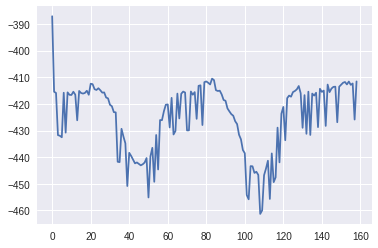

In [14]:
plt.plot(range(len(E)), E)

In [0]:
frames = [0]*len(E)

In [0]:
for i in range(1, len(E)-1):
    if E[i] > E[i+1] and E[i] > E[i-1]:
        frames[i] = 1
    elif E[i+1] > E[i] and E[i-1] > E[i]:
        frames[i] = 1

In [17]:
frames.count(1)

89

In [18]:
(np.array(frames)*np.array(E)).shape

(159,)

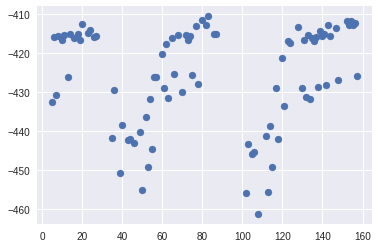

In [19]:
arr = np.array(frames)*np.array(E)
x = np.where(arr != 0)[0]
y = []
for i in x:
    y.append(arr[i])
y = np.array(y)    
plt.scatter(x, y)
plt.show()

In [20]:
y.shape

(89,)

#### Density Clustering

In [0]:
N = 10

In [0]:
from sklearn.cluster import KMeans

In [23]:
x.reshape((x.shape[0], 1))
y.reshape((y.shape[0]), 1)

X = np.stack((x, y), axis=-1)
print(X.shape)
#print(X)

(89, 2)


In [24]:
kmeans = KMeans(n_clusters = N)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [25]:
pred = kmeans.predict(X)
pred = pred.reshape((pred.shape[0], 1))
pred.shape

(89, 1)

In [26]:
t = (pred == 0) * X
m = 0
c = 0
for i in range(t.shape[0]):
    if t[i][1] != 0:
        m += t[i][1]
        c += 1
m = m/c
print(t)
print(c)
print(m)

[[   0.           -0.        ]
 [   0.           -0.        ]
 [   0.           -0.        ]
 [   0.           -0.        ]
 [   0.           -0.        ]
 [   0.           -0.        ]
 [   0.           -0.        ]
 [   0.           -0.        ]
 [  16.         -416.13758299]
 [  18.         -415.07724673]
 [  19.         -416.58779187]
 [  20.         -412.44063175]
 [  23.         -414.78184946]
 [  24.         -414.13584485]
 [  26.         -415.7887027 ]
 [  27.         -415.70903242]
 [   0.           -0.        ]
 [   0.           -0.        ]
 [   0.           -0.        ]
 [   0.           -0.        ]
 [   0.           -0.        ]
 [   0.           -0.        ]
 [   0.           -0.        ]
 [   0.           -0.        ]
 [   0.           -0.        ]
 [   0.           -0.        ]
 [   0.           -0.        ]
 [   0.           -0.        ]
 [   0.           -0.        ]
 [   0.           -0.        ]
 [   0.           -0.        ]
 [   0.           -0.        ]
 [   0. 

In [27]:
mm = t-np.array([0, m])
ind, m = mm[0][0], mm[0][1]**2
for j in range(t.shape[0]):
    if m > mm[j][1]**2:
        m = mm[j][1]**2
        ind = mm[j][0]
ind        

18.0

In [30]:
correct_frames = []
for i in range(N):
    t = (pred == i) * X
    m = 0
    c = 0
    for j in range(t.shape[0]):
        if t[j][1] != 0:
            m += t[j][1]
            c += 1
    m = m/c
    mm = t-np.array([0, m])
    ind, m = mm[0][0], mm[0][1]**2
    for j in range(mm.shape[0]):
        if m > mm[j][1]**2:
            m = mm[j][1]**2
            ind = mm[j][0]
    correct_frames.append(int(ind))
    
correct_frames    

[18, 120, 66, 115, 46, 133, 73, 147, 10, 130]

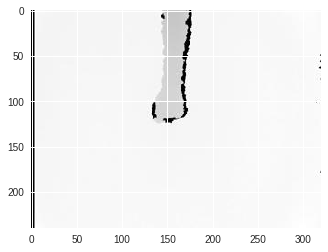

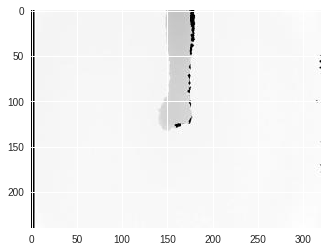

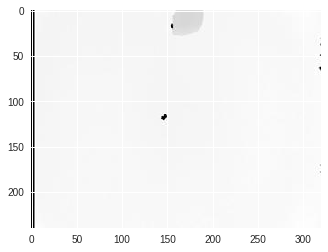

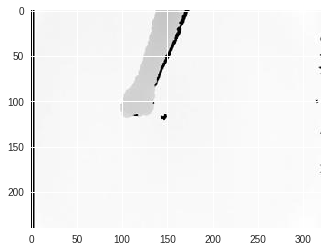

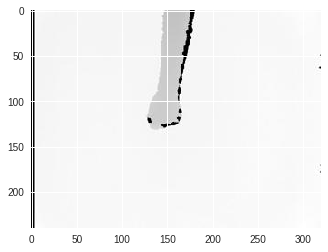

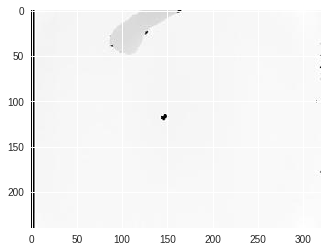

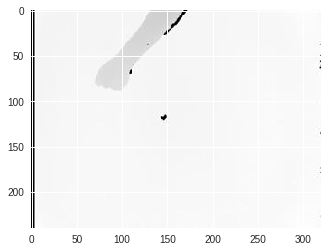

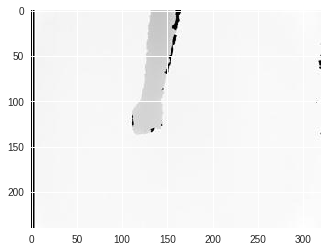

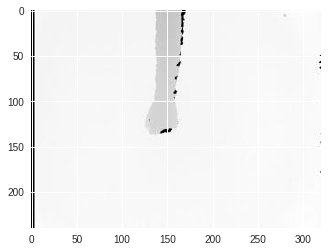

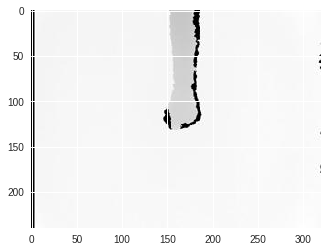

In [34]:
for i in sorted(correct_frames):
    img=mpimg.imread('/content/gdrive/My Drive/Key Frame/output1/frame%d.png' % i)
    imgplot = plt.imshow(img)
    plt.show()

#### References